In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras_tuner as kt
import tensorflow as tf
from tensorflow import keras
from keras import (
    models,
    utils,
    preprocessing,
)
import cv2
import matplotlib.pyplot as plt
import constants

In [9]:
# Define directories
data_folder = os.path.join("..", "data")
model_folder = os.path.join("..", "models")
tune_folder = os.path.join("..", "tuning")

# Seed
seed_value = 42

# Define image sizes
image_shape = constants.IMAGE_SIZE

# Establish paths
test_path = os.path.join(data_folder, "test")
train_path = os.path.join(data_folder, "train")
valid_path = os.path.join(data_folder, "valid")

In [10]:
# Preprocessing function
def preprocess_image(image, label):
    # Convert image to grayscale
    image = tf.image.rgb_to_grayscale(image)
    return image, label

In [11]:
# Load data
test_path = os.path.join(data_folder, "test")

# Load the images sets
test_images = utils.image_dataset_from_directory(
    directory=test_path,
    labels="inferred",
    image_size=(image_shape[0], image_shape[1]),
    shuffle=False,  # Don't shuffle so results are always the same
).map(preprocess_image)

Found 539 files belonging to 3 classes.


In [12]:
# Define model path
model_path = os.path.join(
    model_folder,
    "model_20241112_173454.keras",
)

# Load the model
model = models.load_model(model_path, safe_mode=False)

# Evaluate on test data
test_loss, test_acc = model.evaluate(x=test_images)

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9081 - loss: 0.2439


In [13]:
# Load the grayscale images
img_paths = [
    os.path.join(data_folder, "test", "crack", "test_crack.jpg"),
    os.path.join(data_folder, "test", "missing-head", "test_missinghead.jpg"),
    os.path.join(data_folder, "test", "paint-off", "test_paintoff.jpg"),
]

# Load and preprocess images
img_arrays = []
for img_path in img_paths:
    img = preprocessing.image.load_img(
        img_path, target_size=(image_shape[0], image_shape[1]), color_mode="grayscale"
    )  # Load as grayscale
    img_array = preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_arrays.append(img_array)

# Stack the images into a single array
img_batch = np.vstack(img_arrays)

# Predict
predictions = model.predict(img_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


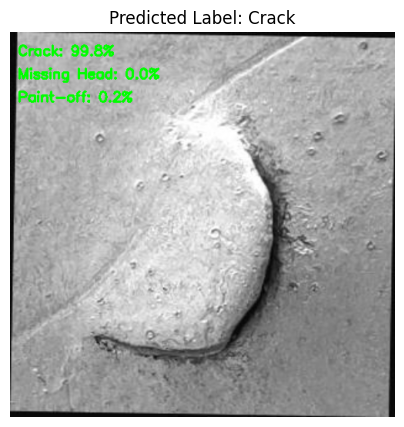

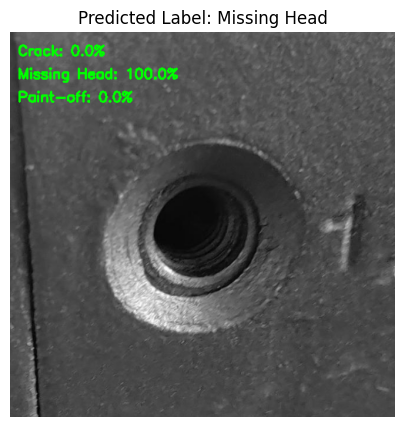

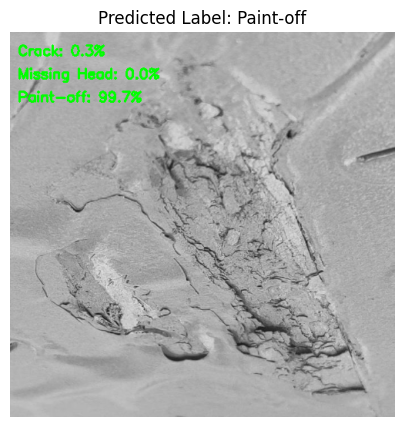

In [14]:
# Class labels for predictions
class_labels = ['Crack', 'Missing Head', 'Paint-off']

# Display each image with predicted probabilities
for i, img_path in enumerate(img_paths):
    # Read and resize the image for display
    img_display = cv2.imread(img_path)
    img_display = cv2.resize(img_display, (500, 500))

    # Overlay class probabilities on the image
    for j, (label, probability) in enumerate(zip(class_labels, predictions[i])):
        text = f"{label}: {probability * 100:.1f}%"
        position = (10, 30 + j * 30)  # Adjust text position for each label
        cv2.putText(img_display, text, position, cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    # Show the image with matplotlib
    plt.figure(figsize=(5, 5))
    plt.imshow(img_display)
    plt.axis('off')
    plt.title(f"Predicted Label: {class_labels[np.argmax(predictions[i])]}")
    plt.show()